# CS166 Assignment 3: Monte Carlo Simulation 

## Set-up: Importing libraries

In [1]:
import random as rand 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as sts
import pylab as pl


## Problem 1: Buffon's Needle Part I 

Here, we perform a simulation of Buffon's needle method in estimating the value of $\pi$ 

**Constraints:**

- $0 \leq X \leq \frac{d}{2}$
- $0 \leq \Theta \leq \frac{\pi}{2}$

Needle touches the line iff $ X \leq \frac{L}{2} sin\Theta$. Therefore, 

$$Pr(\text{needle crosses a line}) = \frac{\text{area under the curve}}{\text{area of rectangle} (X \cdot \Theta)} = \frac{2L}{\pi d}$$

If $d = 2L$, then 

$$Pr(\text{needle crosses a line}) = \frac{1}{\pi}$$

We use simulation to acquire samples based on these equations. To acquire $\pi$:

$$ \begin{array}{lcl} Pr(\text{needle crosses a line}) &=& \frac{\text{Needles that crossed the line}}{\text{Total needles}} \\\frac{\text{Needles that crossed the line}}{\text{Total needles}} &=& \frac{1}{\pi}   \end{array}$$

### Create Functions for Generating values 

In [2]:
def X(d):
    # Generate variable X ranging from [0, d/2]
    return rand.uniform(0, d/2)

def theta():
    # Generate variable theta ranging from [0,pi/2]
    return rand.uniform(0, np.pi/2)
    

### Create simulation function 

In [3]:
def buffon_sim(n):
    """
    This function performs the Buffon needle simulation to 
    approximate the value of 1/pi 
    
    Input: 
        n : number of simulations 
    
    Output:
        Estimation of 1/pi : Total needle hits/ Total needles 
    """
    
    L = 1 # averaege length of a short needle is 1 inch 
    d = 2 * L
    
    # Tracking 
    needle_hits = 0 
    
    for i in range(n):
        # Check if needle is a hit 
        if X(d) <= L/2 * (np.sin(theta())):
            needle_hits += 1 
            
    return needle_hits/n 
        

### Buffon Simulations and Data Presentations

For our simulation, we are basically increasing the number of needles by 1 for each iteration and will be our 1/pi estimate. Then, we get its error by simply getting its difference from the true value of 1/pi. We created two plots: normal plot and loglog plot and both shows different trends. 

In [26]:
pi_estimates = [] 

num_trials = np.arange(100, 10000)

for trial in num_trials:
    pi_estimates.append(buffon_sim(trial))



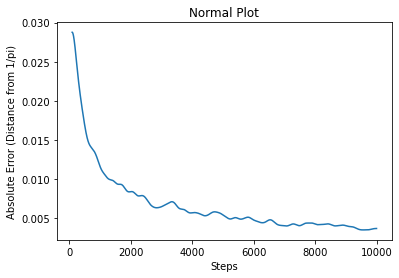

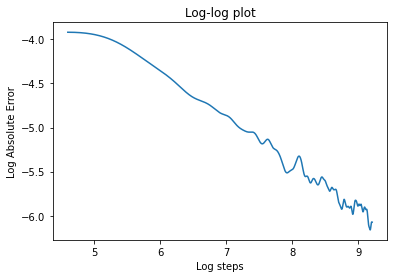

Slope = -0.52, y-intercept = -1.26


In [104]:
pi_estimates = np.array(pi_estimates)

buffon_errors = abs((pi_estimates - 1/np.pi))

# Create values for the log-log plot 
log_trials = np.log(num_trials)
log_buffon_errors = np.log(buffon_errors)

from scipy.ndimage import gaussian_filter1d 
# We used gaussian_filter1d for smoothening the y-values 
# since the y-values are highly fluctuating 

y_smoothed = gaussian_filter1d(buffon_errors, sigma = 100)

plt.plot(num_trials, y_smoothed)
plt.title("Normal Plot")
plt.xlabel("Steps")
plt.ylabel("Absolute Error (Distance from 1/pi)")
plt.show()

y_smoothed_log = gaussian_filter1d(log_buffon_errors, sigma = 100)

plt.plot(log_trials, y_smoothed_log)
plt.title("Log-log plot")
plt.xlabel("Log steps")
plt.ylabel("Log Absolute Error")
plt.show()

# Getting slope and intercept of the log-log plot 

slope, y_int = np.polyfit(log_trials, y_smoothed_log, 1)
print(f"Slope = {np.round(slope,2)}, y-intercept = {np.round(y_int,2)}")

### Analysis of the Buffon Simulations 

For both plots, we used a gaussian smoothing function since the y-values of the simulations are highly volatile and very hard to read. Here, we smoothed the graph with a sigma = 100. The higher the sigma, the smoother the graphs. However, the drawback is that the y-values could also change in scales since we are trying to find the best line of fit. 

In the normal plot, we see a trend that shows an exponential decay. This means thats as we increase the number of needles, the error of the estimates exponentially decreases. At needles beyond 5000, errors tend to be lower than 3 decimal points. As for the log-log plot, we see an almost linear relationship of decreasing trend. The reason for this linear relationship is because of the trend in the normal plot. As the number of needles in the normal plot increases, the percentage change in the error also decreases (the rate of decrease changes). The decrease in the errors will be multiplied by a percentage factor as we increase the steps. After taking the log of these errors, we change the nonlinear relationship to linear. Instead of multiplying by a negative percentage of change $(\text{Error} * -\text{x%})$, it will just be $(\text{Log Error} - \text{x})$. 

As we increase the number of needles for the Buffon simulation, the rate of decrease of error is the log-log plot's slope = $ - 0.52$. 

## Problem 1: Buffon's Needle Part II

For this part, we perform super experiments to have 2 million trails of Buffon's needle experiment

### 1. Partitioning by 10,000 "super experiments" with 200 trials each 

In [139]:
# %%script false --no-raise-error
# NOTE: this was added here and the following two 
# parts so I don't have to edit the table of my results 
# or accidentally change my values

pi_estimates_1 = []

trials = 200 
super_experiments = 10000

for experiment in range(super_experiments):
    pi_estimates_1.append(buffon_sim(trials))
    

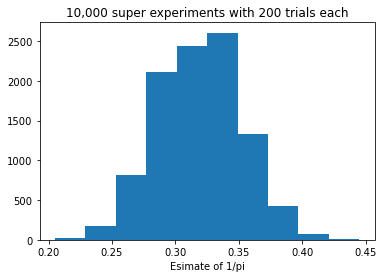

Mean Error 0.00021311381620930936
95% Confidence Interval [0.255 0.385]


In [140]:
# %%script false --no-raise-error

plt.hist(pi_estimates_1)
plt.title("10,000 super experiments with 200 trials each")
plt.xlabel("Esimate of 1/pi")
plt.show()

print("Mean Error", abs(np.mean(pi_estimates_1) - 1/np.pi))
print("95% Confidence Interval", np.quantile(pi_estimates_1, [0.025, 0.975]))

### 2. Partitioning by 1,000 "super experiments" with 2,000 trials each 

In [89]:
%%script false --no-raise-error


pi_estimates_2 = []

trials = 2000 
super_experiments = 1000

for experiment in range(super_experiments):
    pi_estimates_2.append(buffon_sim(trials))
    

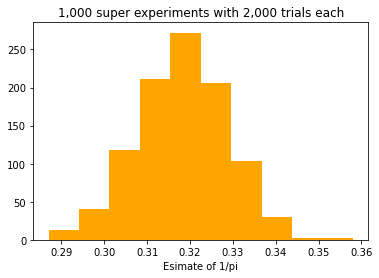

Mean Error 0.00011188618379071036
95% Confidence Interval [0.297  0.3385]


In [100]:
%%script false --no-raise-error

plt.hist(pi_estimates_2, color = 'orange')
plt.title("1,000 super experiments with 2,000 trials each")
plt.xlabel("Esimate of 1/pi")
plt.show()

print("Mean Error", abs(np.mean(pi_estimates_2) - 1/np.pi))
print("95% Confidence Interval", np.quantile(pi_estimates_2, [0.025, 0.975]))

### 3. Partitioning by 100 "super experiments" with 20,000 trials each 

In [92]:
%%script false --no-raise-error

pi_estimates_3 = []

trials = 20000 
super_experiments = 100

for experiment in range(super_experiments):
    pi_estimates_3.append(buffon_sim(trials))

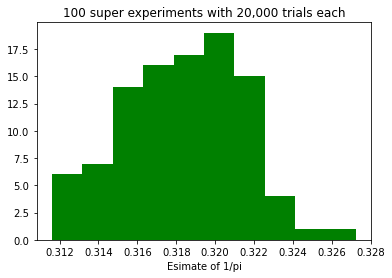

Mean Error 3.811381620932863e-05
95% Confidence Interval [0.312395   0.32388375]


In [103]:
%%script false --no-raise-error

plt.hist(pi_estimates_3, color = 'green')
plt.title("100 super experiments with 20,000 trials each")
plt.xlabel("Esimate of 1/pi")
plt.show()

print("Mean Error", abs(np.mean(pi_estimates_3) - 1/np.pi))
print("95% Confidence Interval", np.quantile(pi_estimates_3, [0.025, 0.975]))

### Summary of Results 

|               Experiments               | Mean Error  | 95% Confidence Interval  |
|:---------------------------------------:|-------------|--------------------------|
| 10,000 super experiments  200 trials    | 2.8511^(-4) |      [0.255, 0.385]      |
| 1,000 super experiments   2,000 trials  | 1.1189^(-4) |      [0.297, 0.339]      |
| 100 super experiments   20,000 trials   | 3.8114^(-5) |      [0.312, 0.324]      |

Here, the mean error was calculated using the mean of the trials subtracted by the true value $1/\pi$. We also calculated the 95% confidence interval of the super experiments with their respective trials. We can see that the mean error decreases as we increase the number of buffon trials despite the decreasing number of buffon experiments. Therefore, having more trials for the simulation can achieve better approximations than clustering smaller number trials with higher numbers of super experiments. 

## Problem 3: Order Statistics 

For this problem, we basically created a function that can return two plots: generated samples and its respective beta distribution. Our approach here is simple. Given a specific k'th value, we randomly acquire values between [0, 1] and append
the k'th value to our samples. Then, we create our Beta probability distribution function and fit it with our generated samples. 


**Definitions**
- $X_1 : \text{minimum}$
- $X_N : \text{maximum}$
- $X_{(N+1)/2} : \text{median for odd-numbered samples}$

In [109]:
def order_stat(k, n):
    """
    This function will be modelin the order statistics 
    through simulation of unformly distributed 
    samples between [0, 1). 
    
    Input:
        k : k'th order
        n : number of samples for the k'th values 
        
    Output: 
        hist : randomly generated samples and its k'th 
                value with 1000 iterations 
        pdf : beta PDF with its respective k'th value 
    """
    # Variables for generating the Beta distribution 
    order_stat = sts.beta(k, n + 1 - k)
    x = np.linspace(0,1, 1000)
    
    samples = []
    
    for i in range(1000):
        # Generate samples between [0, 1) 
        # and add the k'th value 
        sample = sorted(np.random.uniform(0, 1, size = n))
        samples.append(sample[k - 1])

    # Plotting 
    
    plt.hist(samples, density = True, label = 'Generated Samples', alpha = 0.6)
    plt.title(f"The distribition of k = {k} samples and its Beta distribution")
    
    plt.plot(x, order_stat.pdf(x), label = 'Beta distribution')
    plt.legend()
    
    plt.show()


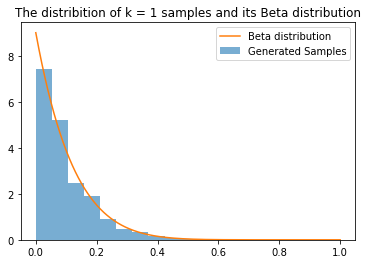

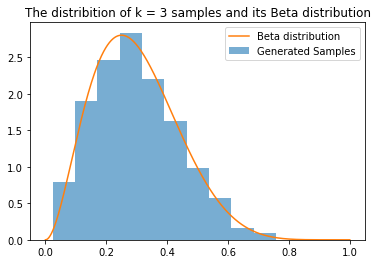

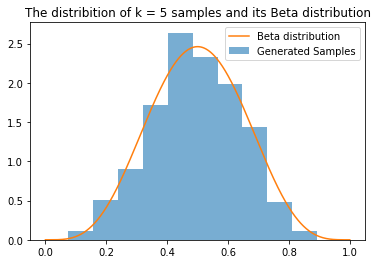

In [110]:
k = [1, 3, 5]

for i in k:
    order_stat(i, 9)

## Problem 4: Markov Chains 

Simulating the Markov Chain with transition matrix: 

$$ P = \begin{bmatrix}  c_0 & \frac{1}{2}e^{-3} & 0 & 0 \\ \frac{1}{2} & 0 & \frac{1}{2} & 0 \\ 0 & \frac{1}{2}e^{-1} & c_2 & \frac{1}{2} \\ 0 & 0 & \frac{1}{2}e^{-1} & c_3 \end{bmatrix} $$

In [115]:
# Acquiring the c_i 

c_0 = 1 - 0.5*np.e**(-3)
c_2 = 1 - 0.5 - 0.5*np.e**(-1)
c_3 = 1 - 0.5*np.e**(-1)

print("c_i probabilities:")
print("c_0 =", c_0)
print("c_2 =", c_2)
print("c_3 =", c_3)

# Creating the transition matrix P 
P = np.matrix([
    [c_0, 0.5*np.e**(-3), 0, 0],
    [1/2, 0, 1/2, 0],
    [0, 0.5*np.e**(-1), c_2, 1/2],
    [0, 0, 0.5*np.e**(-1), c_3]
])

print('\b')
print("Matrix:")
print(P)


c_i probabilities:
c_0 = 0.975106465816068
c_2 = 0.31606027941427883
c_3 = 0.8160602794142788

Matrix:
[[0.97510647 0.02489353 0.         0.        ]
 [0.5        0.         0.5        0.        ]
 [0.         0.18393972 0.31606028 0.5       ]
 [0.         0.         0.18393972 0.81606028]]


### Calculating the Eigenvalues based on P

In [116]:
eigen_val, eigen_vec = np.linalg.eig(P.transpose())

print("Eigenvalue:")
print(np.round(eigen_val[2], 0))
print("Eigenvectors")

# Normalize Eigen Vector
e_v = eigen_vec[:, 2]

e_v = e_v / np.sum(e_v)
print(np.round(e_v, 2))

Eigenvalue:
1.0
Eigenvectors
[[0.64]
 [0.03]
 [0.09]
 [0.24]]


In [117]:
# Set base vector (initial state)
base_x = np.array([1,0,0,0])

# Keep track of the states of the array 
x_1 = [base_x[0]] 
x_2 = [base_x[1]]
x_3 = [base_x[2]]
x_4 = [base_x[3]]

for i in range(300):
    # Simulate transition by multiplying base vector by Matrix P 
    new_x = P.transpose().dot(base_x)
    
    x_1.append(new_x[0,0])
    x_2.append(new_x[0,1])
    x_3.append(new_x[0,2])
    x_4.append(new_x[0,3])

    new_x = np.array(new_x)[0]
    
    base_x = new_x


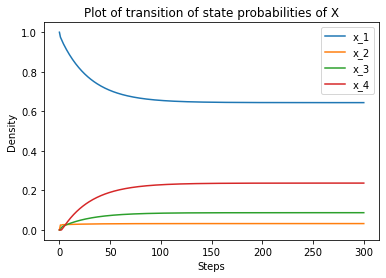

Samples from equilbirum state
x_1 = 0.64
x_2 = 0.03
x_3 = 0.09
x_4 = 0.24


In [118]:
plt.plot(x_1, label = "x_1")
plt.plot(x_2, label = "x_2")
plt.plot(x_3, label = "x_3")
plt.plot(x_4, label = "x_4")
plt.legend()
plt.title("Plot of transition of state probabilities of X")
plt.xlabel("Steps")
plt.ylabel("Density")
plt.show()

print("Samples from equilbirum state")
print("x_1 =", np.round(x_1[250], 2))
print("x_2 =", np.round(x_2[250], 2))
print("x_3 =", np.round(x_3[250], 2))
print("x_4 =", np.round(x_4[250], 2))

### Check if Eigenvectors is equal to our Empirical Result

In [120]:
# Eigenvectors 
eigen_vecs = np.round(e_v, 2)

# Empirical equilirbium vectors
emp_vecs = np.array([[np.round(x_1[250], 2)], [np.round(x_2[250], 2)],
                     [np.round(x_3[250], 2)], [np.round(x_4[250], 2)]])

print("Check if Eigenvectors sum up to 1:")
print(f"Theoretical Vals. :{np.sum(eigen_vecs)}, Empricial Vals. : {np.sum(emp_vecs)}")

print("\b")
print("Check if Theoretical and Empirical Results Match:")
print(eigen_vecs == emp_vecs)

Check if Eigenvectors sum up to 1:
Theoretical Vals. :1.0, Empricial Vals. : 1.0

Check if Theoretical and Empirical Results Match:
[[ True]
 [ True]
 [ True]
 [ True]]
